# Titanic Survival Prediction

We are going to predict who is going to survive, based on the Titanic dataset.

The target variable, whether a passenger survived or not, is a binary outcome (0 or 1), making it suitable for classification modeling. Therefore, classification algorithms are appropriate for this task.




<style>
    table {
        font-family: Arial, sans-serif;
        border-collapse: collapse;
        width: 100%;
    }

    th, td {
        border: 1px solid #dddddd;
        text-align: left;
        padding: 8px;
    }

    th {
        background-color: #f2f2f2;
    }

    tr:nth-child(even) {
        background-color: #f2f2f2;
    }
</style>

<h3>Data Dictionary</h3></br>
<table>
  <tr>
    <th>Variable</th>
    <th>Definition</th>
    <th>Key</th>
  </tr>
  <tr>
    <td>Survival</td>
    <td>Survival</td>
    <td>0 = No, 1 = Yes</td>
  </tr>
  <tr>
    <td>Pclass</td>
    <td>Ticket class</td>
    <td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
  </tr>
  <tr>
    <td>Sex</td>
    <td>Gender of the passenger</td>
    <td></td>
  </tr>
  <tr>
    <td>Age</td>
    <td>Age in years</td>
    <td></td>
  </tr>
  <tr>
    <td>SibSp</td>
    <td>Number of siblings / spouses aboard the Titanic</td>
    <td></td>
  </tr>
  <tr>
    <td>Parch</td>
    <td>Number of parents / children aboard the Titanic</td>
    <td></td>
  </tr>
  <tr>
    <td>Ticket</td>
    <td>Ticket number</td>
    <td></td>
  </tr>
  <tr>
    <td>Fare</td>
    <td>Passenger fare</td>
    <td></td>
  </tr>
  <tr>
    <td>Cabin</td>
    <td>Cabin number</td>
    <td></td>
  </tr>
  <tr>
    <td>Embarked</td>
    <td>Port of Embarkation</td>
    <td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
  </tr>
</table>


### Variable Notes
* Pclass: A proxy for socio-economic status (SES)
  * 1st = Upper
  * 2nd = Middle
  * 3rd = Lower
* Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* SibSp: The dataset defines family relations in this way...
  * Sibling = brother, sister, stepbrother, stepsister
  * Spouse = husband, wife (mistresses and fiancés were ignored)
* Parch: The dataset defines family relations in this way...
  * Parent = mother, father
  * Child = daughter, son, stepdaughter, stepson
      * Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 100) # to see 100 columns of data on the tables we look

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df1 =  pd.read_csv('ttrain.csv')
df2 = pd.read_csv('ttest.csv')

df = pd.concat([df1,df2])

### EDA - Exploratory Data Analysis

In [3]:
df1.shape

(891, 12)

In [4]:
df2.shape

(418, 11)

In [5]:
df.shape

(1309, 12)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
50,51,0.0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.5500,NaN,S
733,734,0.0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
353,354,0.0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8000,NaN,S
616,617,0.0,3,"Danbom, Mr. Ernst Gilbert",male,34.0,1,1,347080,14.4000,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [9]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [11]:
df.Embarked.value_counts()  # shows how many people boarded from each port

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [12]:
df.Embarked.value_counts(normalize = True)  # what percentage of people embarked from each port
                                            # most people boarded from S; let's fill the two missing values with S

Embarked
S    0.699311
C    0.206580
Q    0.094109
Name: proportion, dtype: float64

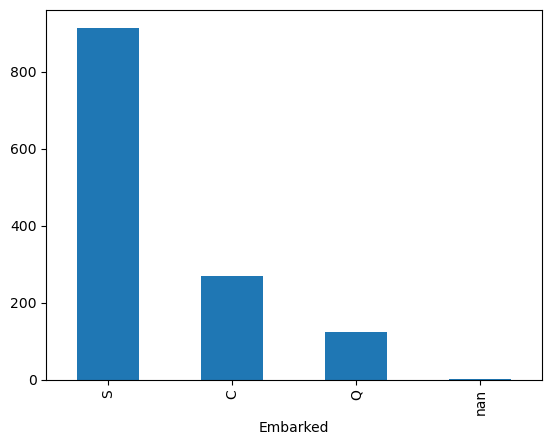

In [13]:
df.Embarked.value_counts(dropna = False).plot(kind = 'bar');

In [14]:
df['Embarked'] = df['Embarked'].fillna('S')  # fill the two missing values in the 'Embarked' column with 'S'; 
                                             # which is the port where most people boarded the ship

In [15]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
df['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [16]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.')
df['Title'] = df['Title'].replace(['Ms', 'Mlle'], 'Miss')
df['Title'] = df['Title'].replace(['Mme', 'Countess', 'Lady', 'Dona'], 'Mrs')  # assuming these titles are typically used by married women
df['Title'] = df['Title'].replace(['Dr', 'Major', 'Col', 'Sir', 'Rev', 'Jonkheer', 'Capt', 'Don'], 'Mr')  # assuming these titles are typically used by men

In [17]:
df.groupby('Sex')['Age'].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [18]:
# fill missing values in the 'Age' column with the median age based on the title
df['Age'].fillna(df.groupby('Title')['Age'].transform('median'), inplace = True)
df.groupby('Title')['Age'].transform('median')  

0      30.0
1      35.5
2      22.0
3      35.5
4      30.0
       ... 
413    30.0
414    35.5
415    30.0
416    30.0
417     4.0
Name: Age, Length: 1309, dtype: float64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [20]:
df['Fare']=df['Fare'].fillna(df['Fare'].mode()[0]) # fill missing values in the 'Fare' column with the mode (most frequent value) of the fare 

In [21]:
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)  # remove unnecessary information that may not contribute much to the analysis or modeling process

In [22]:
df = pd.get_dummies(df, drop_first=True)  # convert categorical variables into binary indicators

In [23]:
# split the DataFrame into training and testing sets
train = df[:891]
test1 = df[891:]

In [24]:
x = train.drop(['Survived'], axis=1)
y = train['Survived']

In [25]:
test1

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,NaN,3,34.5,0,0,7.8292,True,True,False,False,True,False
1,NaN,3,47.0,1,0,7.0000,False,False,True,False,False,True
2,NaN,2,62.0,0,0,9.6875,True,True,False,False,True,False
3,NaN,3,27.0,0,0,8.6625,True,False,True,False,True,False
4,NaN,3,22.0,1,1,12.2875,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,30.0,0,0,8.0500,True,False,True,False,True,False
414,NaN,1,39.0,0,0,108.9000,False,False,False,False,False,True
415,NaN,3,38.5,0,0,7.2500,True,False,True,False,True,False
416,NaN,3,30.0,0,0,8.0500,True,False,True,False,True,False


In [26]:
test = test1.drop('Survived', axis=1)

In [27]:
test.shape

(418, 11)

In [28]:
test

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,3,34.5,0,0,7.8292,True,True,False,False,True,False
1,3,47.0,1,0,7.0000,False,False,True,False,False,True
2,2,62.0,0,0,9.6875,True,True,False,False,True,False
3,3,27.0,0,0,8.6625,True,False,True,False,True,False
4,3,22.0,1,1,12.2875,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
413,3,30.0,0,0,8.0500,True,False,True,False,True,False
414,1,39.0,0,0,108.9000,False,False,False,False,False,True
415,3,38.5,0,0,7.2500,True,False,True,False,True,False
416,3,30.0,0,0,8.0500,True,False,True,False,True,False


### Modeling

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [30]:
g = GaussianNB()
b = BernoulliNB()
r = RandomForestClassifier()
gr = GradientBoostingClassifier()

#### GaussianNB

In [31]:
g.fit(x, y)

GaussianNB()

In [32]:
gprediction = g.predict(test)

In [33]:
prediction1 = pd.DataFrame()
prediction1['PassengerId'] = df2['PassengerId']
prediction1['Survived'] = gprediction

In [34]:
prediction1

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [35]:
prediction1['Survived'] = prediction1['Survived'].astype('int32')

tahmin1.to_csv('Titanic_prediction1.csv', index = False)

In [36]:
prediction1.to_csv('prediction1.csv', index=False)

#### BernoulliNB

In [37]:
b.fit(x, y)

BernoulliNB()

In [38]:
bprediction = b.predict(test)

In [39]:
prediction2 = pd.DataFrame()
prediction2['PassengerId'] = df2['PassengerId']
prediction2['Survived'] = bprediction

In [40]:
prediction2

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [41]:
prediction2['Survived'] = prediction2['Survived'].astype('int32')

In [42]:
prediction2.to_csv('prediction2.csv', index=False)

#### RandomForestClassifier

In [43]:
r.fit(x, y)

RandomForestClassifier()

In [44]:
rprediction = r.predict(test)

In [45]:
prediction3 = pd.DataFrame()
prediction3['PassengerId'] = df2['PassengerId']
prediction3['Survived'] = rprediction

In [46]:
prediction3['Survived'] = prediction3['Survived'].astype('int32')

In [47]:
prediction3.to_csv('prediction3.csv', index=False)

#### GradientBoostingClassifier

In [48]:
gr.fit(x, y)

GradientBoostingClassifier()

In [49]:
grprediction = gr.predict(test)

In [50]:
prediction4 = pd.DataFrame()
prediction4['PassengerId'] = df2['PassengerId']
prediction4['Survived'] = grprediction

In [51]:
prediction4['Survived'] = prediction4['Survived'].astype('int32')

In [52]:
prediction4.to_csv('prediction4.csv', index=False)

### Results

* I have submitted the predictions generated by different classifiers to the Titanic Kaggle competition: 
https://www.kaggle.com/c/titanic. Here are the scores obtained:

#### Model Performance:

1) Score: 0.77511 | GradientBoostingClassifier

2) Score: 0.77033 | BernoulliNB

3) Score: 0.75837 | GaussianNB

4) Score: 0.74162 | RandomForestClassifier